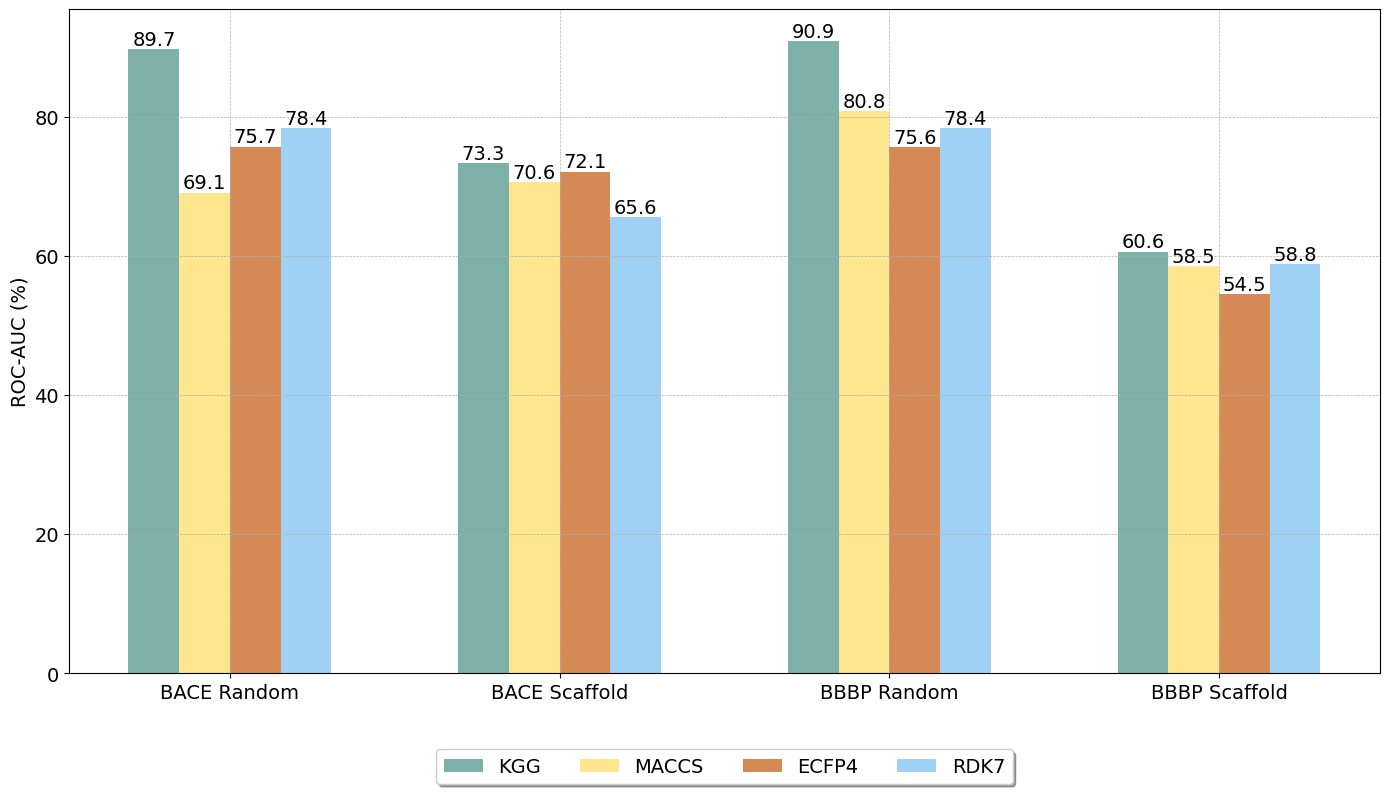

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Updated data based on the new format
data_fingerprints_new = {
    'Dấu vân tay': ['KGG', 'KGG', 'KGG', 'KGG', 'MACCS', 'MACCS', 'MACCS', 'MACCS', 'ECFP4', 'ECFP4', 'ECFP4', 'ECFP4', 'RDK7', 'RDK7', 'RDK7', 'RDK7'],
    'Chia dữ liệu': ['Random', 'Scaffold', 'Random', 'Scaffold', 'Random', 'Scaffold', 'Random', 'Scaffold', 'Random', 'Scaffold', 'Random', 'Scaffold', 'Random', 'Scaffold', 'Random', 'Scaffold'],
    'Dữ liệu': ['BACE', 'BACE', 'BBBP', 'BBBP', 'BACE', 'BACE', 'BBBP', 'BBBP', 'BACE', 'BACE', 'BBBP', 'BBBP', 'BACE', 'BACE', 'BBBP', 'BBBP'],
    'ROC-AUC': [89.7, 73.3, 90.9, 60.6, 69.1, 70.6, 80.8, 58.5, 75.7, 72.1, 75.6, 54.5, 78.4, 65.6, 78.4, 58.8]
}

df_fingerprints_new = pd.DataFrame(data_fingerprints_new)

# Function to plot the bar chart for fingerprints and data splitting with grouped bars and spacing
def plot_fingerprint_chart_new_grouped(df):
    fig, ax = plt.subplots(figsize=(14, 8))
    bar_width = 0.4
    n_groups = len(df['Dữ liệu'].unique()) * 2
    spacing = 1  # Space between each group of 4 bars
    indices = np.arange(n_groups) * (4 * bar_width + spacing)

    # Colors for each fingerprint
    colors = {
        'KGG': '#7DB0A8',
        'MACCS': '#FEE68E',
        'ECFP4': '#D58A55',
        'RDK7': '#9FD1F5'
    }
    
    # Plotting bars for each group
    for i, (name, group) in enumerate(df.groupby(['Dữ liệu', 'Chia dữ liệu'])):
        for j, fingerprint in enumerate(group['Dấu vân tay']):
            values = group[group['Dấu vân tay'] == fingerprint]['ROC-AUC']
            position = indices[i] + j * bar_width
            ax.bar(position, values, bar_width, label=fingerprint if i == 0 else "", color=colors[fingerprint])
            for value in values:
                ax.text(position, value, f'{value:.1f}', color='black', ha='center', va='bottom', fontsize=14)

    ax.set_ylabel('ROC-AUC (%)', fontsize=14)
    ax.set_xticks(indices + 1.5 * bar_width)
    ax.set_xticklabels(['BACE Random', 'BACE Scaffold', 'BBBP Random', 'BBBP Scaffold'], rotation=0, fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Move legend to the bottom
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4, fontsize=14)
    
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('fig/fgsclass.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Plotting the bar chart for fingerprints and data splitting with grouped bars and spacing
plot_fingerprint_chart_new_grouped(df_fingerprints_new)


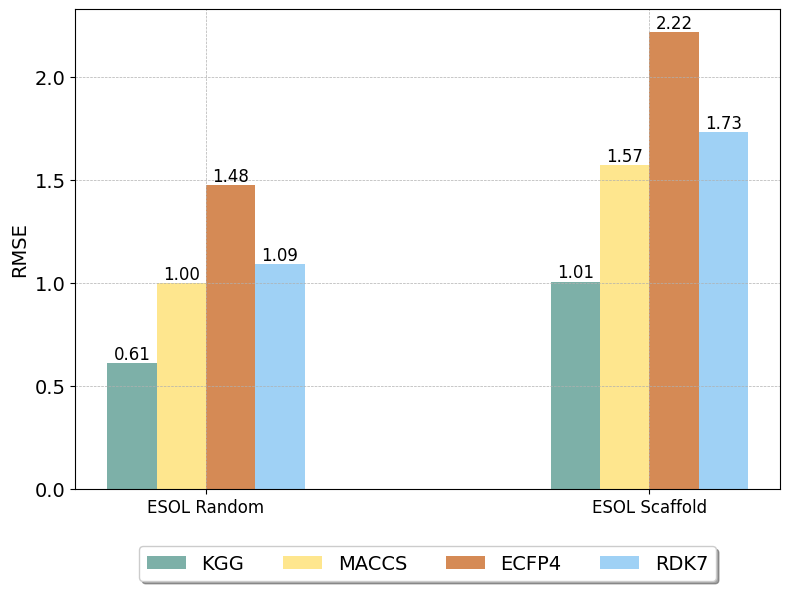

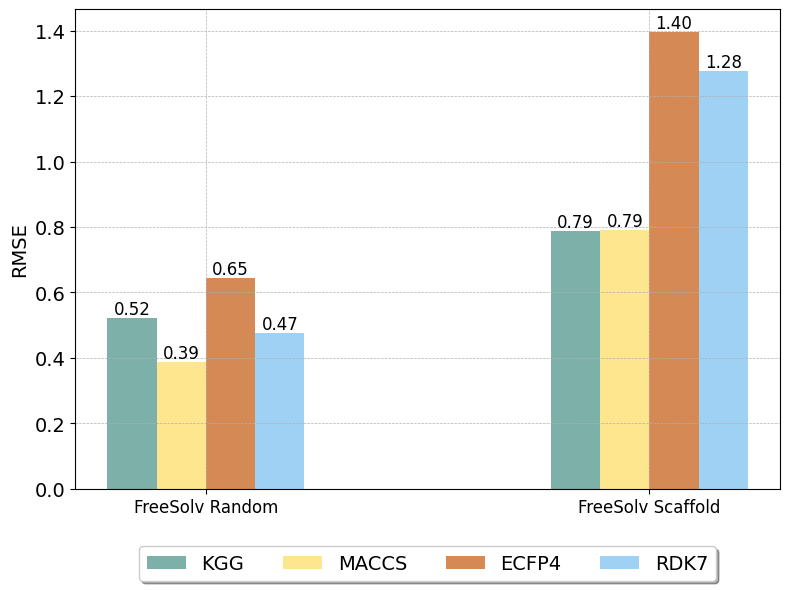

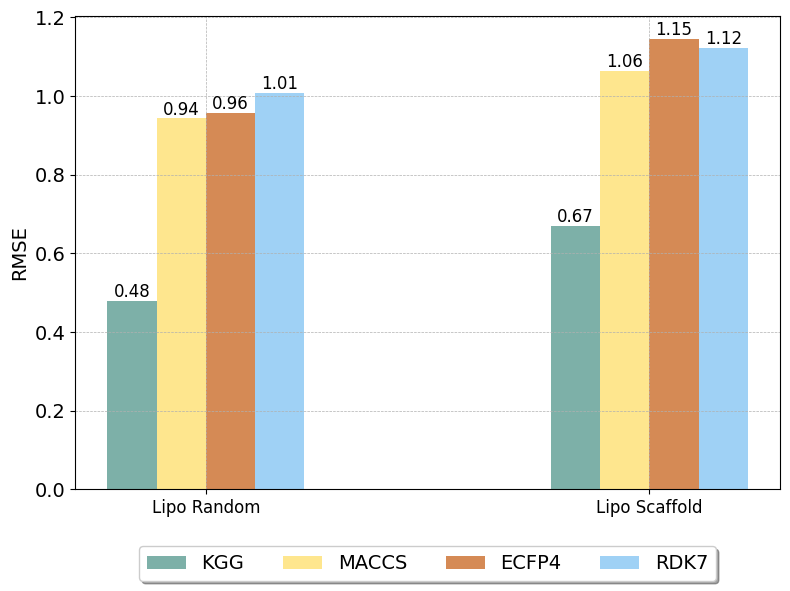

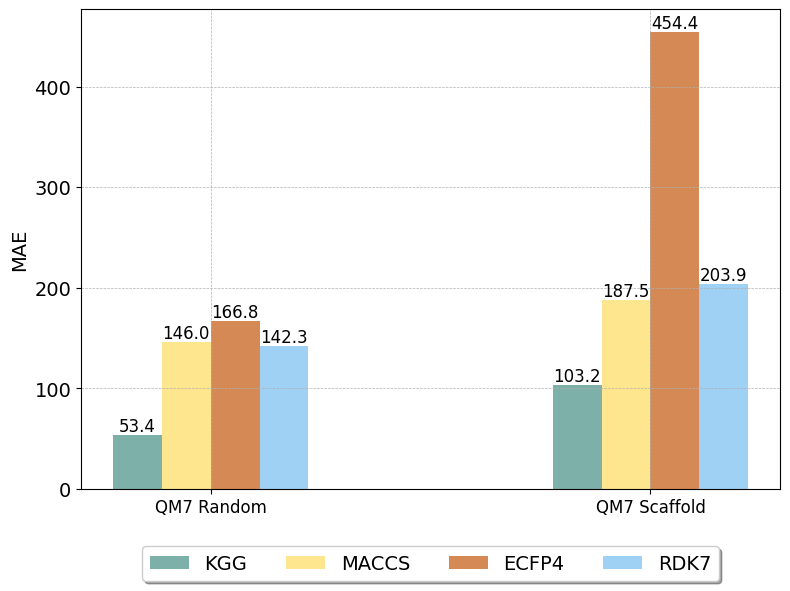

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Updated data based on the new format
data_fingerprints_new = {
    'Dấu vân tay': ['KGG', 'KGG', 'KGG', 'KGG', 'MACCS', 'MACCS', 'MACCS', 'MACCS', 'ECFP4', 'ECFP4', 'ECFP4', 'ECFP4', 'RDK7', 'RDK7', 'RDK7', 'RDK7', 
                    'KGG', 'KGG', 'KGG', 'KGG', 'MACCS', 'MACCS', 'MACCS', 'MACCS', 'ECFP4', 'ECFP4', 'ECFP4', 'ECFP4', 'RDK7', 'RDK7', 'RDK7', 'RDK7'],
    'Chia dữ liệu': ['Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random',
                     'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold'],
    'Dữ liệu': ['ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7',
                'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7'],
    'Value': [0.6110, 0.5220, 0.4780, 53.3976, 0.9990, 0.3880, 0.9430, 146.0150, 1.4760, 0.6450, 0.9580, 166.7676, 1.0920, 0.4750, 1.0070, 142.2874,
              1.0060, 0.7870, 0.6700, 103.1532, 1.5730, 0.7910, 1.0650, 187.4816, 2.2180, 1.3960, 1.1460, 454.3676, 1.7330, 1.2770, 1.1220, 203.9430]
}

# Function to plot the bar chart for fingerprints and data splitting with grouped bars and spacing for each dataset separately
def plot_fingerprint_chart_separate(df):
    datasets = df['Dữ liệu'].unique()
    bar_width = 0.2
    spacing = 1  # Space between each group of 4 bars
    colors = {
        'KGG': '#7DB0A8',
        'MACCS': '#FEE68E',
        'ECFP4': '#D58A55',
        'RDK7': '#9FD1F5'
    }
    
    for dataset in datasets:
        fig, ax = plt.subplots(figsize=(8, 6))
        dataset_df = df[df['Dữ liệu'] == dataset]
        n_groups = len(dataset_df['Chia dữ liệu'].unique())
        indices = np.arange(n_groups) * (4 * bar_width + spacing)
        
        for i, (name, group) in enumerate(dataset_df.groupby('Chia dữ liệu')):
            for j, fingerprint in enumerate(group['Dấu vân tay']):
                values = group[group['Dấu vân tay'] == fingerprint]['Value']
                position = indices[i] + j * bar_width
                ax.bar(position, values, bar_width, label=fingerprint if i == 0 else "", color=colors[fingerprint])
                for value in values:
                    ax.text(position, value, f'{value:.2f}' if value < 10 else f'{value:.1f}', color='black', ha='center', va='bottom', fontsize=12)
        if dataset != 'QM7':
            ax.set_ylabel('RMSE', fontsize=14)
        else:
            ax.set_ylabel('MAE', fontsize=14)
        ax.set_xticks(indices + 1.5 * bar_width)
        ax.set_xticklabels([f'{dataset} {name}' for name in dataset_df['Chia dữ liệu'].unique()], rotation=0, fontsize=12)
        ax.tick_params(axis='y', labelsize=14)
        
        # Move legend to the bottom
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4, fontsize=14)
        
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.savefig(f'fig/fgsregression_{dataset}.png', dpi=600, bbox_inches='tight', transparent=False)
        plt.show()

# Plotting the bar chart for fingerprints and data splitting with grouped bars and spacing for each dataset separately
plot_fingerprint_chart_separate(df_fingerprints_new)


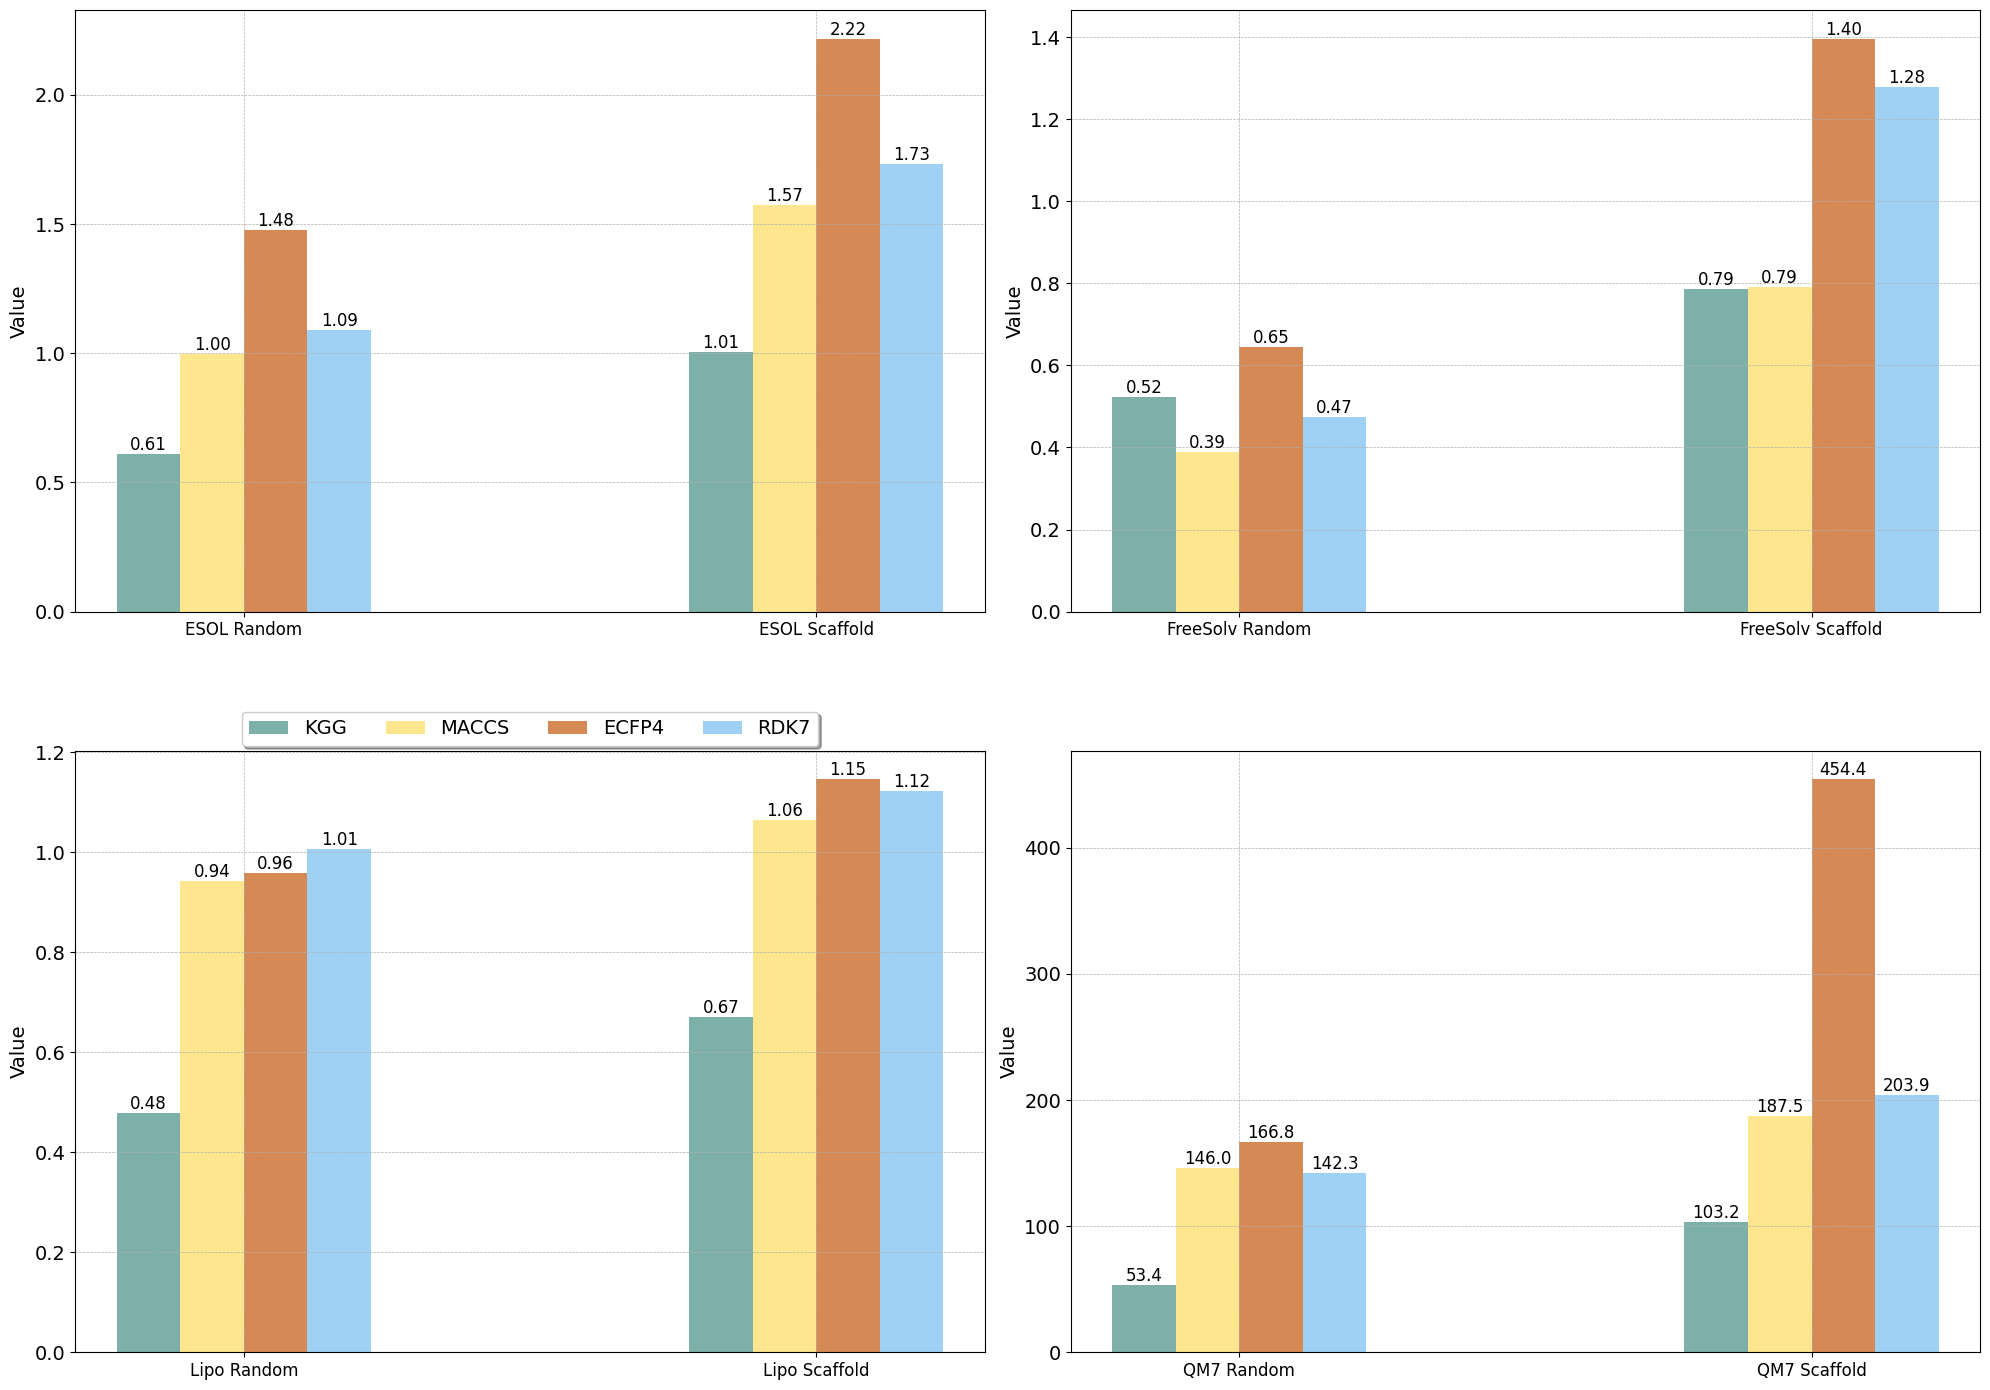

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Updated data based on the new format
data_fingerprints_new = {
    'Dấu vân tay': ['KGG', 'KGG', 'KGG', 'KGG', 'MACCS', 'MACCS', 'MACCS', 'MACCS', 'ECFP4', 'ECFP4', 'ECFP4', 'ECFP4', 'RDK7', 'RDK7', 'RDK7', 'RDK7', 
                    'KGG', 'KGG', 'KGG', 'KGG', 'MACCS', 'MACCS', 'MACCS', 'MACCS', 'ECFP4', 'ECFP4', 'ECFP4', 'ECFP4', 'RDK7', 'RDK7', 'RDK7', 'RDK7'],
    'Chia dữ liệu': ['Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random', 'Random',
                     'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold', 'Scaffold'],
    'Dữ liệu': ['ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7',
                'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7', 'ESOL', 'FreeSolv', 'Lipo', 'QM7'],
    'Value': [0.6110, 0.5220, 0.4780, 53.3976, 0.9990, 0.3880, 0.9430, 146.0150, 1.4760, 0.6450, 0.9580, 166.7676, 1.0920, 0.4750, 1.0070, 142.2874,
              1.0060, 0.7870, 0.6700, 103.1532, 1.5730, 0.7910, 1.0650, 187.4816, 2.2180, 1.3960, 1.1460, 454.3676, 1.7330, 1.2770, 1.1220, 203.9430]
}

df_fingerprints_new = pd.DataFrame(data_fingerprints_new)

# Function to plot the bar chart for fingerprints and data splitting with grouped bars and spacing for each dataset in subplots
def plot_fingerprint_chart_subplots(df):
    datasets = df['Dữ liệu'].unique()
    bar_width = 0.2
    spacing = 1  # Space between each group of 4 bars
    colors = {
        'KGG': '#7DB0A8',
        'MACCS': '#FEE68E',
        'ECFP4': '#D58A55',
        'RDK7': '#9FD1F5'
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))
    axes = axes.flatten()
    
    for idx, dataset in enumerate(datasets):
        ax = axes[idx]
        dataset_df = df[df['Dữ liệu'] == dataset]
        n_groups = len(dataset_df['Chia dữ liệu'].unique())
        indices = np.arange(n_groups) * (4 * bar_width + spacing)
        
        for i, (name, group) in enumerate(dataset_df.groupby('Chia dữ liệu')):
            for j, fingerprint in enumerate(group['Dấu vân tay']):
                values = group[group['Dấu vân tay'] == fingerprint]['Value']
                position = indices[i] + j * bar_width
                ax.bar(position, values, bar_width, label=fingerprint if i == 0 else "", color=colors[fingerprint])
                for value in values:
                    ax.text(position, value, f'{value:.2f}' if value < 10 else f'{value:.1f}', color='black', ha='center', va='bottom', fontsize=12)
        
        ax.set_ylabel('Value', fontsize=14)
        ax.set_xticks(indices + 1.5 * bar_width)
        ax.set_xticklabels([f'{dataset} {name}' for name in dataset_df['Chia dữ liệu'].unique()], rotation=0, fontsize=12)
        ax.tick_params(axis='y', labelsize=14)
        
        if idx == 0:
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=4, fontsize=14)
        
        ax.grid(True, linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.savefig('fig/FingerprintComparison_Subplots.png', dpi=600, bbox_inches='tight', transparent=False)
    plt.show()

# Plotting the bar chart for fingerprints and data splitting with grouped bars and spacing for each dataset in subplots
plot_fingerprint_chart_subplots(df_fingerprints_new)


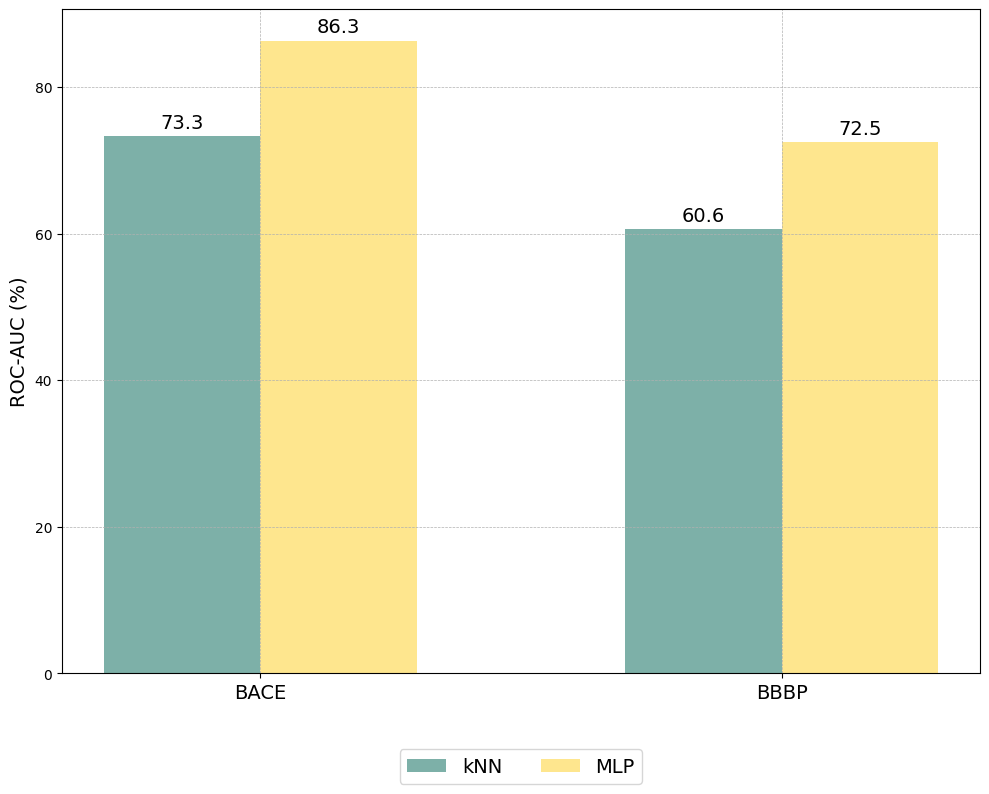

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
labels = ['BACE', 'BBBP']
kNN_scores = [73.3, 60.6]
MLP_scores = [86.3, 72.5]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

# Adjust figsize
fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, kNN_scores, width, label='kNN', color='#7DB0A8')
rects2 = ax.bar(x + width/2, MLP_scores, width, label='MLP', color='#FEE68E')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC-AUC (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, fontsize=14)

# Function to add labels above bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

add_labels(rects1)
add_labels(rects2)
plt.grid(True, linestyle='--', linewidth=0.5)
fig.tight_layout()

# Save and display the chart
plt.savefig('fig/comparekNN_MLP_class.png', dpi=600, bbox_inches='tight', transparent=False)
plt.show()


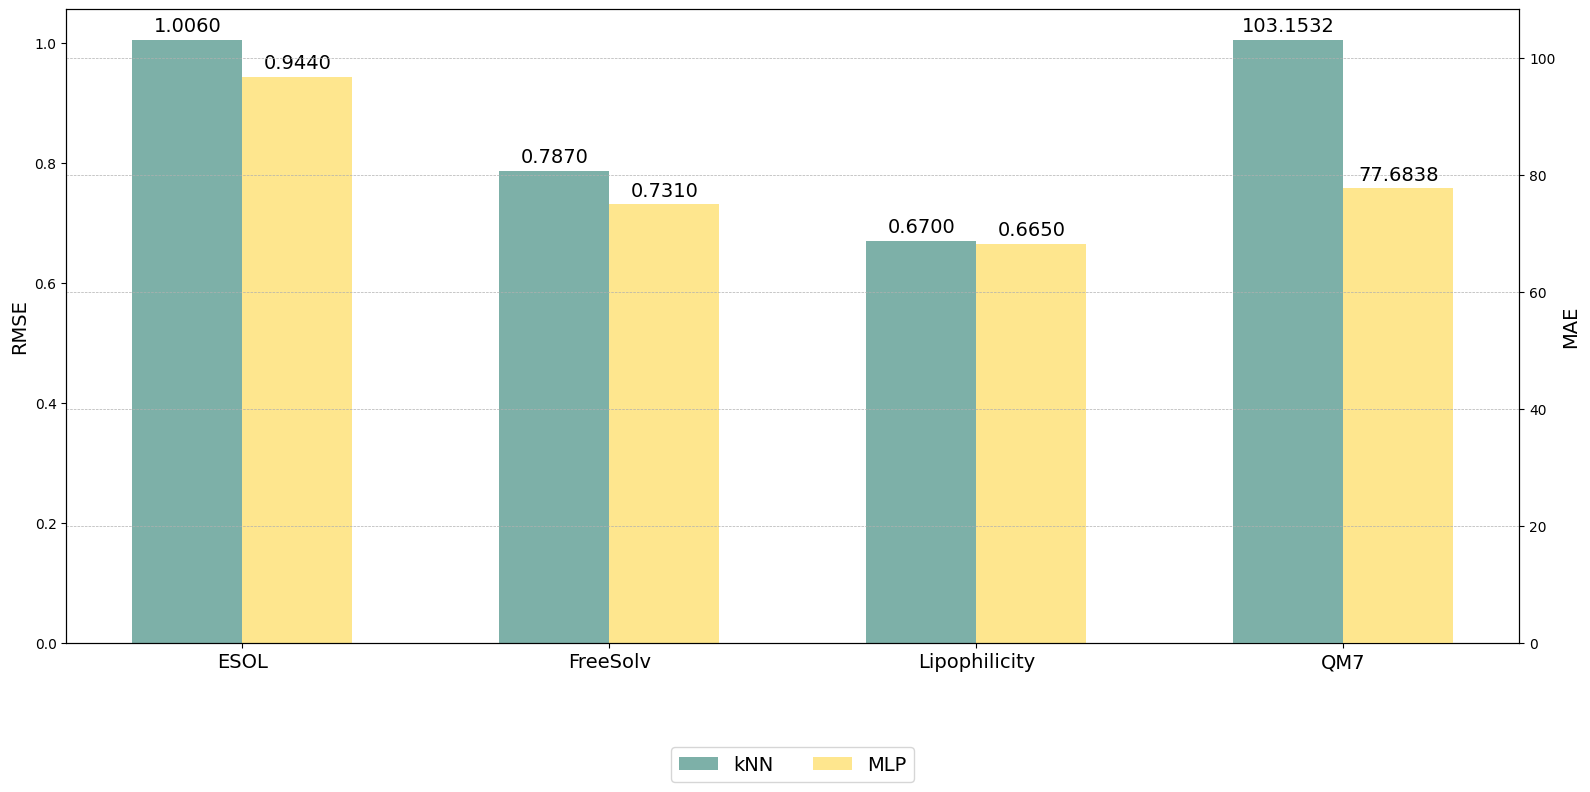

In [33]:
# Data for subplots
datasets = ['ESOL', 'FreeSolv', 'Lipophilicity']
kNN_RMSE = [1.006, 0.787, 0.670]
MLP_RMSE = [0.944, 0.731, 0.665]
qm7_kNN_MAE = [103.1532]
qm7_MLP_MAE = [77.6838]

fig, ax1 = plt.subplots(figsize=(16, 8))

# Plotting the first three datasets on the left y-axis
rects1 = ax1.bar(np.arange(len(datasets)) - width/2, kNN_RMSE, width, label='kNN', color='#7DB0A8')
rects2 = ax1.bar(np.arange(len(datasets)) + width/2, MLP_RMSE, width, label='MLP', color='#FEE68E')

# Plotting the QM7 dataset on the right y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
rects3 = ax2.bar(np.arange(len(datasets), len(datasets) + 1) - width/2, qm7_kNN_MAE, width, label='kNN-QM7', color='#7DB0A8')
rects4 = ax2.bar(np.arange(len(datasets), len(datasets) + 1) + width/2, qm7_MLP_MAE, width, label='MLP-QM7', color='#FEE68E')

# Add labels
ax1.set_ylabel('RMSE', fontsize=14)
ax2.set_ylabel('MAE', fontsize=14)
ax1.set_xticks(np.arange(len(datasets) + 1))
ax1.set_xticklabels(datasets + ['QM7'], fontsize=14)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=14)
# ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.20), ncol=2, fontsize=14)

# Function to add labels above bars
def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14)

add_labels(rects1, ax1)
add_labels(rects2, ax1)
add_labels(rects3, ax2)
add_labels(rects4, ax2)
plt.grid(True, linestyle='--', linewidth=0.5)
fig.tight_layout()

# Save and display the chart
plt.savefig('fig/comparekNN_MLP_regression.png', dpi=600, bbox_inches='tight', transparent=False)
plt.show()
